In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import scipy as sp
import sys

In [92]:
df = pd.read_excel('Delays_3 for histogram.xlsx')

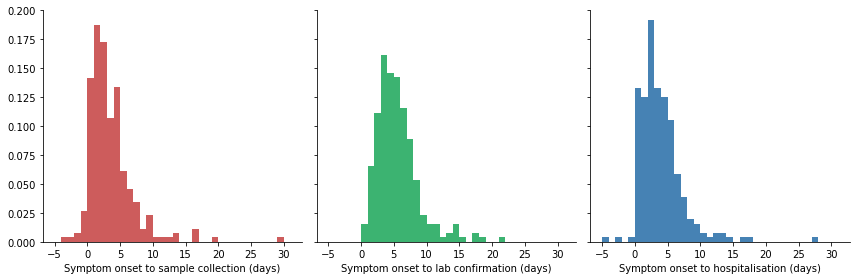

In [93]:
plt.figure(figsize=(12,4))
vmin = np.nanmin(df.iloc[:,-3:].values)
vmax = np.nanmax(df.iloc[:,-3:].values)
plt.subplot(1,3,3)
plt.hist(df['Symptom onset to hospitalisation'],bins=np.arange(vmin,vmax,1),zorder=-1,color='steelblue',density=True)
plt.ylim(0,0.2)
plt.gca().set_yticklabels([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Symptom onset to hospitalisation (days)')

plt.subplot(1,3,2)
plt.hist(df['Symptom onset to lab confirmation'],bins=np.arange(vmin,vmax,1),zorder=-1,color='mediumseagreen',density=True)
plt.ylim(0,0.2)
plt.gca().set_yticklabels([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Symptom onset to lab confirmation (days)')

plt.subplot(1,3,1)
plt.hist(df['Symptom onset to sample collection'],bins=np.arange(vmin,vmax,1),zorder=-1,color='indianred',density=True)
plt.ylim(0,0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Symptom onset to sample collection (days)')

plt.tight_layout()
plt.savefig('Figures/delayplot.png',dpi=600)

In [94]:
f = open("outputs/combined_delays.csv", "w")
f.write("All,N,Mean (95% CI),SD (95% CI)\n")
for l in df.iloc[:,-3:].columns:
    vals = df[l].values.flatten()
    vals = vals[~np.isnan(vals)]
    means = []
    sds = []
    for i in range(10000):
        boots = np.random.choice(vals,size=vals.shape[0],replace=True)
        means.append(np.nanmean(boots))
        sds.append(np.nanstd(boots))
    f.write(f"{l},{vals.shape[0]},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}-{np.quantile(sds,0.975):0.3f})\n")    
    print(f"{l},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}{np.quantile(sds,0.975):0.3f})\n")
f.close()

Symptom onset to sample collection,3.038 (2.609-3.487),3.553 (2.7574.387)

Symptom onset to lab confirmation,5.146 (4.732-5.594),3.643 (2.8644.471)

Symptom onset to hospitalisation,3.426 (3.035-3.848),3.332 (2.6634.075)



In [95]:
df = pd.read_excel('Delays subgroups.xlsx')

In [96]:
df.head()

,Patient Number,cluster_3,cat_4,cat_2,#arrival to symponset,#symponset to sample collection,#symponset to testresult,#sample collection to results
0,1.0,NaN,Imported International,NaN,3.0,1.0,4.0,3.0
1,2.0,NaN,Local Traced,NaN,NaN,0.0,1.0,1.0
2,3.0,NaN,Local Traced,NaN,NaN,0.0,1.0,1.0
3,4.0,NaN,Imported International,NaN,-4.0,4.0,5.0,1.0
4,5.0,NaN,Imported International,NaN,3.0,1.0,2.0,1.0


In [97]:
f = open("outputs/combined_delays.csv", "a")
for k in df['cat_4'].unique():
    f.write(f"{k},N,Mean (95% CI),SD (95% CI)\n")
    for l in df.iloc[:,-4:].columns:
        vals = df[df['cat_4']==k][l].values.flatten()
        vals = vals[~np.isnan(vals)]
        print(f"{k}:{vals.shape[0]}",end='')
        means = []
        sds = []
        for i in range(10000):
            boots = np.random.choice(vals,size=vals.shape[0],replace=True)
            means.append(np.nanmean(boots))
            sds.append(np.nanstd(boots))
        f.write(f"{l},{vals.shape[0]},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}-{np.quantile(sds,0.975):0.3f})\n")    
        print(f"{l},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}{np.quantile(sds,0.975):0.3f})\n")
f.close()

Imported International:57#arrival to symponset,3.333 (1.771-5.404),7.022 (3.59210.687)

Imported International:58#symponset to sample collection,2.621 (1.828-3.569),3.393 (1.7944.549)

Imported International:58#symponset to testresult,4.672 (3.897-5.603),3.339 (1.9604.429)

Imported International:121#sample collection to results,2.050 (1.826-2.298),1.323 (1.0431.584)

Local Traced:5#arrival to symponset,8.000 (3.000-13.000),5.865 (1.9607.255)

Local Traced:51#symponset to sample collection,2.667 (1.765-3.980),4.152 (1.4816.628)

Local Traced:51#symponset to testresult,4.784 (3.804-6.157),4.376 (1.7416.943)

Local Traced:823#sample collection to results,2.334 (2.209-2.481),1.995 (1.2572.737)

Local Untraced:5#arrival to symponset,5.600 (3.400-8.200),2.577 (0.4003.600)

Local Untraced:112#symponset to sample collection,3.554 (3.018-4.107),2.939 (2.4023.493)

Local Untraced:112#symponset to testresult,5.661 (5.098-6.241),3.107 (2.5573.599)

Local Untraced:443#sample collection to results,

In [98]:
f = open("outputs/combined_delays.csv", "a")
for k in df['cluster_3'].dropna().unique():
    f.write(f"{k},N,Mean (95% CI),SD (95% CI)\n")
    for l in df.iloc[:,-4:].columns:
        vals = df[df['cluster_3']==k][l].values
        vals = vals[~np.isnan(vals)]
        print(f"{k}:{vals.shape[0]}",end='')
        means = []
        sds = []
        for i in range(10000):
            boots = np.random.choice(vals,size=vals.shape[0],replace=True)
            means.append(np.nanmean(boots))
            sds.append(np.nanstd(boots))
        f.write(f"{l},{vals.shape[0]},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}-{np.quantile(sds,0.975):0.3f})\n")    
        print(f"{l},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}{np.quantile(sds,0.975):0.3f})\n")
f.close()

pharma:0

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
C:\Users\Saptarshi\AppData\Roaming\Python\Python36\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


#arrival to symponset,nan (nan-nan),nan (nannan)

pharma:17#symponset to sample collection,3.000 (2.118-3.882),1.847 (1.2892.220)

pharma:17#symponset to testresult,4.706 (3.882-5.529),1.807 (1.1942.237)

pharma:76#sample collection to results,1.908 (1.711-2.119),0.920 (0.6561.176)

tj:4#arrival to symponset,5.250 (1.750-7.500),3.112 (0.4333.767)

tj:8#symponset to sample collection,10.875 (5.250-17.500),8.894 (3.46211.769)

tj:8#symponset to testresult,13.000 (7.375-19.750),9.152 (3.46212.135)

tj:97#sample collection to results,1.979 (1.794-2.175),0.974 (0.7821.139)



In [3]:
df = pd.read_excel('testturnover3404.xlsx')

In [11]:
f = open("outputs/combined_delays.csv", "a")
f.write("Test Turnover,N,Mean (95% CI),SD (95% CI)\n")
vals = df['#sample collection to results']
vals = vals[~np.isnan(vals)]
print(f"{vals.shape[0]}",end='')
means = []
sds = []
for i in range(10000):
    boots = np.random.choice(vals,size=vals.shape[0],replace=True)
    means.append(np.nanmean(boots))
    sds.append(np.nanstd(boots))
f.write(f"#sample collection to results,{vals.shape[0]},{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}-{np.quantile(sds,0.975):0.3f})\n")    
print(f"#sample collection to results,{np.nanmean(vals):0.3f} ({np.quantile(means,0.025):0.3f}-{np.quantile(means,0.975):0.3f}),{np.nanstd(vals):0.3f} ({np.quantile(sds,0.025):0.3f}-{np.quantile(sds,0.975):0.3f})\n")
f.close()

3397#sample collection to results,3.453 (3.380-3.527),2.180 (2.111-2.250)

